## Step 1: Install the keras-retinanet repo

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/project_6/keras-retinanet/

/content/gdrive/MyDrive/project_6/keras-retinanet


In [3]:
#install the keras-retinanet repo
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/gdrive/MyDrive/project_6/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=169521 sha256=073eb00d35be8ad01d743490073b755e15a094728af57f4a1019e168cf26abe6
  Stored in directory: /root/.cache/pip/wheels/7d/ad/3f/c8e123f71b0a3aac845e62ff32b995338ef40a3bf56d1123fd
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=7943e20ad97c7b59feee38e96399b6e098f2589dfe22587b15379f52

In [4]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


## Step 2: Import all required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import urllib
from keras_retinanet.utils.visualization import draw_box, draw_boxes, draw_caption, label_color
from keras_retinanet.utils.image import preprocess_image, resize_image

## Step 3. Download pre-trained model

In [ ]:
pwd

'/content/gdrive/MyDrive/project_6/keras-retinanet'

In [ ]:
if not os.path.exists("snapshots"):
  os.mkdir("snapshots")

In [ ]:
url_model = "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5"
pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5"
urllib.request.urlretrieve(url_model, pretrained_model)

('/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5',
 <http.client.HTTPMessage at 0x7fd0bc7c8210>)

## Step 4. Tune the Pre-trained Model

In [ ]:
cd /content/gdrive/MyDrive/project_6/keras-retinanet

/content/gdrive/MyDrive/project_6/keras-retinanet


In [ ]:
#runtime was disconnected in the middle of epoch 9
#probably hit the 12 hours limit

pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5"

!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --random-transform \
    --weights {pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

Creating model, this may take a second...

2022-06-06 14:26:26.105841: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

WARNING:tensorflow:Skipping loading weights for layer #208 (named regression_submodel) due to mismatch in shape for weight pyramid_regression/kernel:0. Weight expects shape (3, 3, 256, 60). Received saved weight with shape (36, 256, 3, 3)

WARNING:tensorflow:Skipping loading weights for layer #208 (named regression_submodel) due to mismatch in shape for weight pyramid_regression/bias:0. Weight expects shape (60,). Received saved weight with shape (36,)

WARNING:tensorflow:Skipping loading weights for layer #212 (named classification_submodel) due to mismatch in shape for weight pyramid_classification/kernel:0. Weight expects shape (3, 3, 256, 90). Received saved weight with shape (720, 256, 3, 3)

WARNING:tensorflow:Skipping loading weights for layer #212 (named classification_submodel) due to mismatch in shape for weight pyramid_classification/bias:0. Weight expects shape (90,). Received saved weight with shape (720,)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)

Model: "retinanet"

Remove the model summary here because it is too long

==================================================================================================
Total params: 36,624,982

Trainable params: 13,063,830

Non-trainable params: 23,561,152
__________________________________________________________________________________________________
None
keras_retinanet/bin/train.py:548: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

  initial_epoch=args.initial_epoch

Epoch 1/30

tcmalloc: large alloc 1129021440 bytes == 0x5dfd0000 @  0x7f36b4a231e7 0x7f367bb5032f 0x7f367e69878a 0x7f367eaf5d24 0x7f367eb45d1e 0x7f367eb46fb7 0x7f367eb47fba 0x7f367eb4c1ee 0x7f367eb4dfe5 0x7f367eb4e5ef 0x7f3673f772b8 0x7f3673f09f33 0x7f367994f1b1 0x7f367994be73 0x7f3674630515 0x7f36b43e76db 0x7f36b472061f

125/125 [==============================] - ETA: 0s - loss: 5.1242 - regression_loss: 2.2252 - classification_loss: 2.8990

Epoch 1: saving model to ./snapshots/resnet50_csv_01.h5

125/125 [==============================] - 4930s 39s/step - loss: 5.1242 - regression_loss: 2.2252 - classification_loss: 2.8990 - lr: 1.0000e-05

Epoch 2/30

125/125 [==============================] - ETA: 0s - loss: 3.2108 - regression_loss: 2.0448 - classification_loss: 1.1660 

Epoch 2: saving model to ./snapshots/resnet50_csv_02.h5

125/125 [==============================] - 4817s 38s/step - loss: 3.2108 - regression_loss: 2.0448 - classification_loss: 1.1660 - lr: 1.0000e-05

Epoch 3/30

125/125 [==============================] - ETA: 0s - loss: 2.8563 - regression_loss: 1.9109 - classification_loss: 0.9454 

Epoch 3: saving model to ./snapshots/resnet50_csv_03.h5

125/125 [==============================] - 4748s 38s/step - loss: 2.8563 - regression_loss: 1.9109 - classification_loss: 0.9454 - lr: 1.0000e-05

Epoch 4/30

125/125 [==============================] - ETA: 0s - loss: 2.7582 - regression_loss: 1.8437 - classification_loss: 0.9145 

Epoch 4: saving model to ./snapshots/resnet50_csv_04.h5

125/125 [==============================] - 4857s 39s/step - loss: 2.7582 - regression_loss: 1.8437 - classification_loss: 0.9145 - lr: 1.0000e-05

Epoch 5/30

125/125 [==============================] - ETA: 0s - loss: 2.7908 - regression_loss: 1.8565 - classification_loss: 0.9344 

Epoch 5: saving model to ./snapshots/resnet50_csv_05.h5

125/125 [==============================] - 4908s 39s/step - loss: 2.7908 - regression_loss: 1.8565 - classification_loss: 0.9344 - lr: 1.0000e-05

Epoch 6/30

125/125 [==============================] - ETA: 0s - loss: 2.6854 - regression_loss: 1.8204 - classification_loss: 0.8650 

Epoch 6: saving model to ./snapshots/resnet50_csv_06.h5

125/125 [==============================] - 4795s 38s/step - loss: 2.6854 - regression_loss: 1.8204 - classification_loss: 0.8650 - lr: 1.0000e-05

Epoch 7/30

125/125 [==============================] - ETA: 0s - loss: 2.5767 - regression_loss: 1.7676 - classification_loss: 0.8091 

Epoch 7: saving model to ./snapshots/resnet50_csv_07.h5

125/125 [==============================] - 4753s 38s/step - loss: 2.5767 - regression_loss: 1.7676 - classification_loss: 0.8091 - lr: 1.0000e-05

Epoch 8/30

125/125 [==============================] - ETA: 0s - loss: 2.5224 - regression_loss: 1.7283 - classification_loss: 0.7941 

Epoch 8: saving model to ./snapshots/resnet50_csv_08.h5

125/125 [==============================] - 4745s 38s/step - loss: 2.5224 - regression_loss: 1.7283 - classification_loss: 0.7941 - lr: 1.0000e-05

Epoch 9/30

113/125 [==========================>...] - ETA: 7:50 - loss: 2.4072 - regression_loss: 1.6487 - classification_loss: 0.7585

In [ ]:
#try to use epoch 8 from previous run as pre-trained model
#after epoch 6, the learning was automatically reduced to 1e-6 from 1e-5
#it is called ReduceLROnPlateau.
#Saw an example online where someone ran the training with this repo and learning was reduced to 1e-28 ???
#note sure why reduce learning on plateau, counter-intuitive
#hit the 12 hr mark again in the middle of epoch 8

r1e8_pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/r1e8_resnet50_csv.h5"
!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --random-transform \
    --weights {r1e8_pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

Creating model, this may take a second...

2022-06-07 03:59:49.374410: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.

  super(Adam, self).__init__(name, **kwargs)

Model: "retinanet"

==================================================================================================
Total params: 36,624,982
Trainable params: 13,063,830
Non-trainable params: 23,561,152
__________________________________________________________________________________________________
Epoch 1/30

tcmalloc: large alloc 1129021440 bytes == 0x622c4000 @  0x7ff3ebf341e7 0x7ff3b306132f 0x7ff3b5ba978a 0x7ff3b6006d24 0x7ff3b6056d1e 0x7ff3b6057fb7 0x7ff3b6058fba 0x7ff3b605d1ee 0x7ff3b605efe5 0x7ff3b605f5ef 0x7ff3ab4882b8 0x7ff3ab41af33 0x7ff3b0e601b1 0x7ff3b0e5ce73 0x7ff3abb41515 0x7ff3eb8f86db 0x7ff3ebc3161f

125/125 [==============================] - ETA: 0s - loss: 2.4316 - regression_loss: 1.6594 - classification_loss: 0.7722 

Epoch 1: saving model to ./snapshots/resnet50_csv_01.h5

125/125 [==============================] - 4688s 37s/step - loss: 2.4316 - regression_loss: 1.6594 - classification_loss: 0.7722 - lr: 1.0000e-05

Epoch 2/30

125/125 [==============================] - ETA: 0s - loss: 2.4415 - regression_loss: 1.6319 - classification_loss: 0.8096 

Epoch 2: saving model to ./snapshots/resnet50_csv_02.h5

125/125 [==============================] - 4534s 36s/step - loss: 2.4415 - regression_loss: 1.6319 - classification_loss: 0.8096 - lr: 1.0000e-05

Epoch 3/30

125/125 [==============================] - ETA: 0s - loss: 2.3940 - regression_loss: 1.6148 - classification_loss: 0.7793 

Epoch 3: saving model to ./snapshots/resnet50_csv_03.h5

125/125 [==============================] - 4658s 37s/step - loss: 2.3940 - regression_loss: 1.6148 - classification_loss: 0.7793 - lr: 1.0000e-05

Epoch 4/30

125/125 [==============================] - ETA: 0s - loss: 2.2710 - regression_loss: 1.5153 - classification_loss: 0.7557 

Epoch 4: saving model to ./snapshots/resnet50_csv_04.h5

125/125 [==============================] - 4603s 37s/step - loss: 2.2710 - regression_loss: 1.5153 - classification_loss: 0.7557 - lr: 1.0000e-05

Epoch 5/30

125/125 [==============================] - ETA: 0s - loss: 2.3812 - regression_loss: 1.6272 - classification_loss: 0.7540 

Epoch 5: saving model to ./snapshots/resnet50_csv_05.h5

125/125 [==============================] - 5697s 46s/step - loss: 2.3812 - regression_loss: 1.6272 - classification_loss: 0.7540 - lr: 1.0000e-05

Epoch 6/30

125/125 [==============================] - ETA: 0s - loss: 2.3210 - regression_loss: 1.5855 - classification_loss: 0.7355  

Epoch 6: saving model to ./snapshots/resnet50_csv_06.h5

Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

125/125 [==============================] - 8343s 67s/step - loss: 2.3210 - regression_loss: 1.5855 - classification_loss: 0.7355 - lr: 1.0000e-05

Epoch 7/30

125/125 [==============================] - ETA: 0s - loss: 2.2757 - regression_loss: 1.5826 - classification_loss: 0.6931  

Epoch 7: saving model to ./snapshots/resnet50_csv_07.h5

125/125 [==============================] - 8070s 64s/step - loss: 2.2757 - regression_loss: 1.5826 - classification_loss: 0.6931 - lr: 1.0000e-06

Epoch 8/30

47/125 [==========>...................] - ETA: 1:01:02 - loss: 2.1052 - regression_loss: 1.3957 - classification_loss: 0.7095


In [ ]:
#try to use epoch 7 from previous run as pre-trained model
#start with default learning rate 1e-5 again, not 1e-6 like epoch 7 on previous run
#interupt at epoch 9, close to 12 hr mark anyway
#to try larger learning rate

r2e7_pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/r2e7_resnet50_csv.h5"
!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --random-transform \
    --weights {r2e7_pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

Epoch 1/30

tcmalloc: large alloc 1129021440 bytes == 0x5d808000 @  0x7fe206e8c1e7 0x7fe1cdfb932f 0x7fe1d0b0178a 0x7fe1d0f5ed24 0x7fe1d0faed1e 0x7fe1d0faffb7 0x7fe1d0fb0fba 0x7fe1d0fb51ee 0x7fe1d0fb6fe5 0x7fe1d0fb75ef 0x7fe1c63e02b8 0x7fe1c6372f33 0x7fe1cbdb81b1 0x7fe1cbdb4e73 0x7fe1c6a99515 0x7fe2068506db 0x7fe206b8961f

125/125 [==============================] - ETA: 0s - loss: 2.2817 - regression_loss: 1.5336 - classification_loss: 0.7481 

Epoch 1: saving model to ./snapshots/resnet50_csv_01.h5

125/125 [==============================] - 5119s 41s/step - loss: 2.2817 - regression_loss: 1.5336 - classification_loss: 0.7481 - lr: 1.0000e-05

Epoch 2/30

125/125 [==============================] - ETA: 0s - loss: 2.1762 - regression_loss: 1.4807 - classification_loss: 0.6955 

Epoch 2: saving model to ./snapshots/resnet50_csv_02.h5

125/125 [==============================] - 4956s 40s/step - loss: 2.1762 - regression_loss: 1.4807 - classification_loss: 0.6955 - lr: 1.0000e-05

Epoch 3/30

125/125 [==============================] - ETA: 0s - loss: 2.1546 - regression_loss: 1.4572 - classification_loss: 0.6974 

Epoch 3: saving model to ./snapshots/resnet50_csv_03.h5

125/125 [==============================] - 5066s 40s/step - loss: 2.1546 - regression_loss: 1.4572 - classification_loss: 0.6974 - lr: 1.0000e-05

Epoch 4/30

125/125 [==============================] - ETA: 0s - loss: 2.1033 - regression_loss: 1.4405 - classification_loss: 0.6627 

Epoch 4: saving model to ./snapshots/resnet50_csv_04.h5

125/125 [==============================] - 5193s 42s/step - loss: 2.1033 - regression_loss: 1.4405 - classification_loss: 0.6627 - lr: 1.0000e-05

Epoch 5/30

125/125 [==============================] - ETA: 0s - loss: 2.2311 - regression_loss: 1.4717 - classification_loss: 0.7594 

Epoch 5: saving model to ./snapshots/resnet50_csv_05.h5

125/125 [==============================] - 5060s 40s/step - loss: 2.2311 - regression_loss: 1.4717 - classification_loss: 0.7594 - lr: 1.0000e-05

Epoch 6/30

125/125 [==============================] - ETA: 0s - loss: 2.0576 - regression_loss: 1.4024 - classification_loss: 0.6552 

Epoch 6: saving model to ./snapshots/resnet50_csv_06.h5

125/125 [==============================] - 4868s 39s/step - loss: 2.0576 - regression_loss: 1.4024 - classification_loss: 0.6552 - lr: 1.0000e-05

Epoch 7/30

125/125 [==============================] - ETA: 0s - loss: 2.0175 - regression_loss: 1.3618 - classification_loss: 0.6558 

Epoch 7: saving model to ./snapshots/resnet50_csv_07.h5

125/125 [==============================] - 5084s 41s/step - loss: 2.0175 - regression_loss: 1.3618 - classification_loss: 0.6558 - lr: 1.0000e-05

Epoch 8/30

125/125 [==============================] - ETA: 0s - loss: 2.0348 - regression_loss: 1.3994 - classification_loss: 0.6354 

Epoch 8: saving model to ./snapshots/resnet50_csv_08.h5

125/125 [==============================] - 4853s 39s/step - loss: 2.0348 - regression_loss: 1.3994 - classification_loss: 0.6354 - lr: 1.0000e-05

Epoch 9/30

28/125 [=====>........................] - ETA: 1:02:43 - loss: 2.0292 - regression_loss: 1.4167 - classification_loss: 0.6125^C


In [ ]:
#use epoch 8 from previous run (round 3) as the pretrained
#increase learning rate to 1e-4 instead of 1e-5
#the losses don't go down faster with learning rate 1e-4
#not sure why it failed to save epoch 6, the runtime was still connected
#when this happened, couldn't use os commands such as cd, pwd, ls

r3e8_pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/r3e8_resnet50_csv.h5"
!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --lr 1e-4 \
    --random-transform \
    --weights {r3e8_pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

Epoch 1/30

tcmalloc: large alloc 1129021440 bytes == 0x281c8000 @  0x7efe59be81e7 0x7efe20d1532f 0x7efe2385d78a 0x7efe23cbad24 0x7efe23d0ad1e 0x7efe23d0bfb7 0x7efe23d0cfba 0x7efe23d111ee 0x7efe23d12fe5 0x7efe23d135ef 0x7efe1913c2b8 0x7efe190cef33 0x7efe1eb141b1 0x7efe1eb10e73 0x7efe197f5515 0x7efe595ac6db 0x7efe598e561f

125/125 [==============================] - ETA: 0s - loss: 2.3846 - regression_loss: 1.6203 - classification_loss: 0.7642 

Epoch 1: saving model to ./snapshots/resnet50_csv_01.h5

125/125 [==============================] - 4797s 38s/step - loss: 2.3846 - regression_loss: 1.6203 - classification_loss: 0.7642 - lr: 1.0000e-04

Epoch 2/30

125/125 [==============================] - ETA: 0s - loss: 2.3081 - regression_loss: 1.4200 - classification_loss: 0.8881 

Epoch 2: saving model to ./snapshots/resnet50_csv_02.h5

125/125 [==============================] - 4693s 38s/step - loss: 2.3081 - regression_loss: 1.4200 - classification_loss: 0.8881 - lr: 1.0000e-04

Epoch 3/30

125/125 [==============================] - ETA: 0s - loss: 2.0710 - regression_loss: 1.3907 - classification_loss: 0.6803 

Epoch 3: saving model to ./snapshots/resnet50_csv_03.h5

125/125 [==============================] - 4782s 38s/step - loss: 2.0710 - regression_loss: 1.3907 - classification_loss: 0.6803 - lr: 1.0000e-04

Epoch 4/30

125/125 [==============================] - ETA: 0s - loss: 1.9828 - regression_loss: 1.3679 - classification_loss: 0.6150 

Epoch 4: saving model to ./snapshots/resnet50_csv_04.h5

125/125 [==============================] - 7065s 57s/step - loss: 1.9828 - regression_loss: 1.3679 - classification_loss: 0.6150 - lr: 1.0000e-04

Epoch 5/30

125/125 [==============================] - ETA: 0s - loss: 1.9535 - regression_loss: 1.3090 - classification_loss: 0.6445  

Epoch 5: saving model to ./snapshots/resnet50_csv_05.h5

125/125 [==============================] - 8477s 68s/step - loss: 1.9535 - regression_loss: 1.3090 - classification_loss: 0.6445 - lr: 1.0000e-04

Epoch 6/30

125/125 [==============================] - ETA: 0s - loss: 1.8034 - regression_loss: 1.2175 - classification_loss: 0.5859  

Epoch 6: saving model to ./snapshots/resnet50_csv_06.h5

Traceback (most recent call last):
  File "keras_retinanet/bin/train.py", line 553, in <module>
    main()

  File "keras_retinanet/bin/train.py", line 548, in main
    initial_epoch=args.initial_epoch

  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 2223, in fit_generator
    initial_epoch=initial_epoch)

  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "keras_retinanet/bin/../../keras_retinanet/callbacks/common.py", line 31, in on_epoch_end
tensorflow.python.framework.errors_impl.FailedPreconditionError: . is not a directory

## Step 5. Plot the losses vs. epoch

In [3]:
epoch = list(range(1,29))
reg_loss = [2.2252, 2.0448, 1.9109, 1.8437, 1.8565, 1.8204, 1.7676, 1.7283, 1.6594, 1.6319,
            1.6148, 1.5153, 1.6272, 1.5855, 1.5826, 1.5336, 1.4807, 1.4572, 1.4405, 1.4717,
            1.4024, 1.3618, 1.3994, 1.6203, 1.42, 1.3907, 1.3679, 1.309]
clf_loss = [2.8990, 1.166, .9454, .9145, .9344, .8650, .8091, .7941, .7722, .8096,
            .7793, .7557, .7540, .7355, .6931, .7481, .6955, .6974, .6627, .7594,
            .6552, .6558, .6354, .7642, .8881, .6803, .615, .6445]
total_loss = [5.1242, 3.2108, 2.8563, 2.7582, 2.7908, 2.6854, 2.5767, 2.5224, 2.4316, 2.4415,
              2.3940, 2.2710, 2.3812, 2.3210, 2.2757, 2.2817, 2.1762, 2.1546, 2.1033, 2.2311,
              2.0576, 2.0175, 2.0348, 2.3846, 2.3081, 2.071, 1.9828, 1.9535]
time = [4930, 4817, 4748, 4857, 4908, 4795, 4753, 4745, 4688, 4534,
        4658, 4603, 5697, 8343, 8070, 5119, 4956, 5066, 5193, 5060,
        4868, 5084, 4853, 4797, 4693, 4782, 7065, 8477]
train_summary = {"epoch": epoch,
                 "reg_loss": reg_loss,
                 "clf_loss": clf_loss,
                 "total_loss": total_loss,
                 "time": time}

obj_det_train = pd.DataFrame(data=train_summary)
#make sure the total loss is the sum
obj_det_train["check"] = obj_det_train["reg_loss"]+obj_det_train["clf_loss"]-obj_det_train["total_loss"]
obj_det_train

,epoch,reg_loss,clf_loss,total_loss,time,check
0,1,2.2252,2.8990,5.1242,4930,0.000000e+00
1,2,2.0448,1.1660,3.2108,4817,0.000000e+00
2,3,1.9109,0.9454,2.8563,4748,0.000000e+00
3,4,1.8437,0.9145,2.7582,4857,0.000000e+00
4,5,1.8565,0.9344,2.7908,4908,1.000000e-04
5,6,1.8204,0.8650,2.6854,4795,0.000000e+00
6,7,1.7676,0.8091,2.5767,4753,0.000000e+00
7,8,1.7283,0.7941,2.5224,4745,0.000000e+00
8,9,1.6594,0.7722,2.4316,4688,0.000000e+00
9,10,1.6319,0.8096,2.4415,4534,0.000000e+00


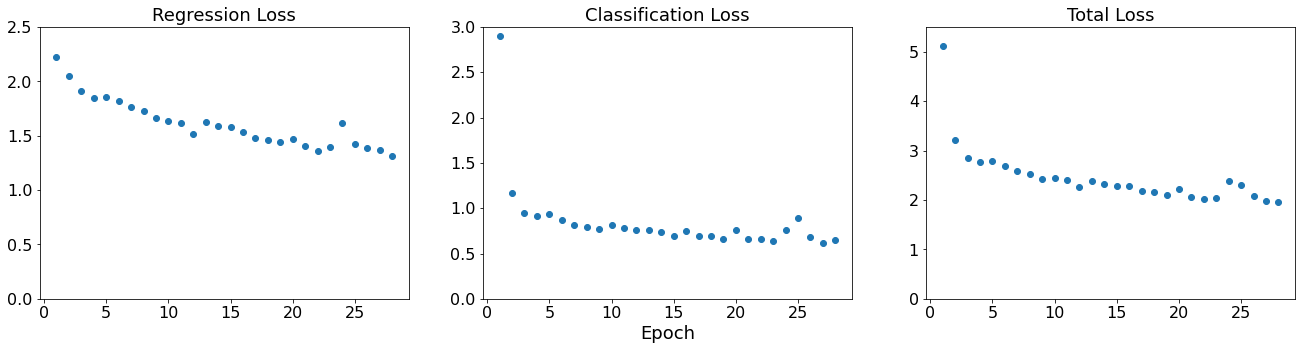

In [22]:
#plot the losses
plt.figure(figsize = (22.5,5))

plt.subplot(1,3,1)
plt.scatter(obj_det_train["epoch"], obj_det_train["reg_loss"])
plt.title("Regression Loss", fontsize=18)
plt.ylim(0,2.5)
plt.xticks(ticks=list(range(0,30,5)),
           labels=[str(i) for i in range(0,30,5)],
           fontsize=16)
plt.yticks(ticks=np.arange(0,3.0,0.5),
           labels=[str(i) for i in np.arange(0,3.0,0.5)],
           fontsize=16)

plt.subplot(1,3,2)
plt.scatter(obj_det_train["epoch"], obj_det_train["clf_loss"])
plt.title("Classification Loss", fontsize=18)
plt.ylim(0,3)
plt.xlabel("Epoch", fontsize=18)
plt.xticks(ticks=list(range(0,30,5)),
           labels=[str(i) for i in range(0,30,5)],
           fontsize=16)
plt.yticks(ticks=np.arange(0,3.5,0.5),
           labels=[str(i) for i in np.arange(0,3.5,0.5)],
           fontsize=16)

plt.subplot(1,3,3)
plt.scatter(obj_det_train["epoch"], obj_det_train["total_loss"])
plt.title("Total Loss", fontsize=18)
plt.ylim(0,5.5)
plt.xticks(ticks=list(range(0,30,5)),
           labels=[str(i) for i in range(0,30,5)],
           fontsize=16)
plt.yticks(ticks=list(range(0,6,1)),
           labels=[str(i) for i in list(range(0,6,1))],
           fontsize=16);

The classification loss dropped very quickly at the begining. The regression loss also decreased relatively quickly the first 3 epochs. Afer that both losses slowly decreased. There were some spikes but overall the losses were trending down. The spike at epoch 24 was because we changed the learning rate (LR) from 1e-5 to 1e-4. Increasing the LR didn't seem to make the loss go down faster. In fact, the train.py script has the ReduceLROnPlateau which reduces the LR when the loss is plateauing. Not quite sure why it reduces the LR instead of increasing it.

Each epoch takes about 1.5 hr on average. After 28 epoches the losses still seem high.